In [1]:
import load
import models

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np
from datetime import datetime, timedelta
from matplotlib.dates import DateFormatter
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf
from statsmodels.regression.quantile_regression import QuantReg

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, RepeatVector, TimeDistributed

/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [4]:
## Load data (just one link)
data = load.traveltimes_onelink(start_date = '2019-01-01', end_date = '2019-04-07')
start = data.index[0]
end   = data.index[len(data)-1]
period = (end - start).days
period_train_days = 12*7
period_test_days = 7
advance_days = 1
num_partitions = int( (period - period_train_days - period_test_days ) /advance_days)
print("Training over", period_train_days, "days and testing on", period_test_days, "days.")
print(num_partitions, "partitions are trained over.")

Training over 84 days and testing on 7 days.
5 partitions are trained over.


# Cross validate lag and $\alpha$

PARTITION  1
   LAG =  12
       Alpha =  2
7967/7967 [==============================] - 52s 7ms/sample - loss: 1712.1746
Model error (RMSE) =  29.96 seconds
    --- > BEST SO FAR!
Perecentage in 90% Prediction Interval (ICP) =  0.926


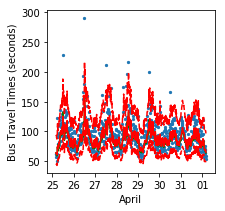

   LAG =  12
       Alpha =  3
7967/7967 [==============================] - 50s 6ms/sample - loss: 1686.6094
Model error (RMSE) =  35.84 seconds
Perecentage in 90% Prediction Interval (ICP) =  0.740


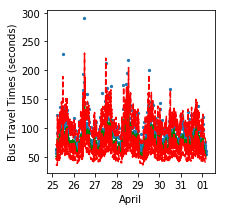

   LAG =  12
       Alpha =  4
7967/7967 [==============================] - 51s 6ms/sample - loss: 2045.6207
Model error (RMSE) =  34.05 seconds
Perecentage in 90% Prediction Interval (ICP) =  0.848


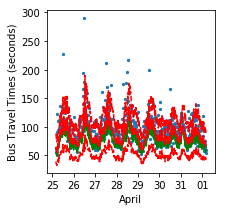

   LAG =  12
       Alpha =  5
7967/7967 [==============================] - 75s 9ms/sample - loss: 1866.8058
Model error (RMSE) =  29.33 seconds
    --- > BEST SO FAR!
Perecentage in 90% Prediction Interval (ICP) =  0.979


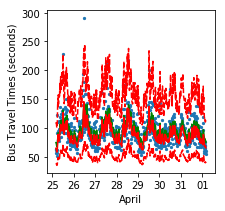

   LAG =  12
       Alpha =  6
7967/7967 [==============================] - 70s 9ms/sample - loss: 1734.8041
Model error (RMSE) =  29.77 seconds
Perecentage in 90% Prediction Interval (ICP) =  0.940


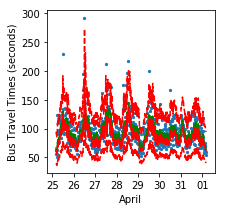

   LAG =  12
       Alpha =  7
7967/7967 [==============================] - 55s 7ms/sample - loss: 1636.1910
Model error (RMSE) =  32.36 seconds
Perecentage in 90% Prediction Interval (ICP) =  0.958


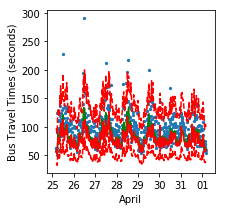

   LAG =  12
       Alpha =  8
7967/7967 [==============================] - 64s 8ms/sample - loss: 1888.2810
Model error (RMSE) =  30.45 seconds
Perecentage in 90% Prediction Interval (ICP) =  0.949


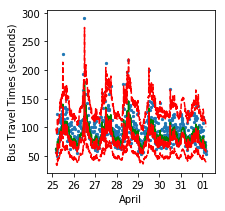

   LAG =  15
       Alpha =  2
7967/7967 [==============================] - 66s 8ms/sample - loss: 1760.8729
Model error (RMSE) =  30.51 seconds
Perecentage in 90% Prediction Interval (ICP) =  0.929


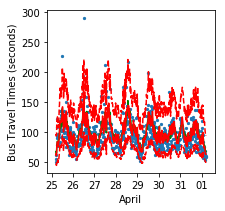

   LAG =  15
       Alpha =  3
7967/7967 [==============================] - 68s 8ms/sample - loss: 1775.1672
Model error (RMSE) =  30.91 seconds
Perecentage in 90% Prediction Interval (ICP) =  0.979


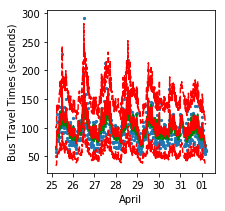

   LAG =  15
       Alpha =  4
7967/7967 [==============================] - 67s 8ms/sample - loss: 1983.7373
Model error (RMSE) =  32.26 seconds
Perecentage in 90% Prediction Interval (ICP) =  0.902


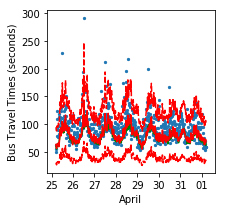

   LAG =  15
       Alpha =  5
7967/7967 [==============================] - 92s 12ms/sample - loss: 2493.8601
Model error (RMSE) =  30.76 seconds
Perecentage in 90% Prediction Interval (ICP) =  0.783


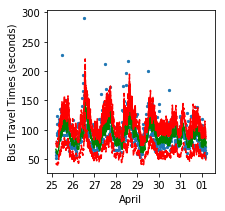

   LAG =  15
       Alpha =  6
7967/7967 [==============================] - 78s 10ms/sample - loss: 3332.0955
Model error (RMSE) =  41.68 seconds
Perecentage in 90% Prediction Interval (ICP) =  0.429


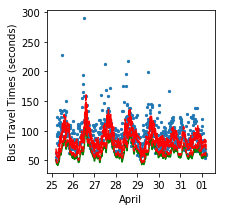

   LAG =  15
       Alpha =  7
7967/7967 [==============================] - 55s 7ms/sample - loss: 1873.8180
Model error (RMSE) =  31.50 seconds
Perecentage in 90% Prediction Interval (ICP) =  0.935


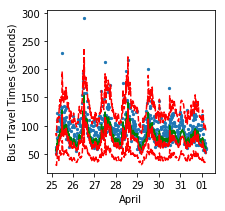

   LAG =  15
       Alpha =  8
7967/7967 [==============================] - 63s 8ms/sample - loss: 1894.4222
Model error (RMSE) =  30.04 seconds
Perecentage in 90% Prediction Interval (ICP) =  0.961


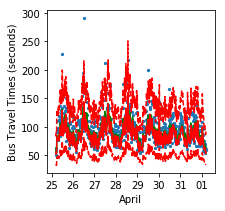

   LAG =  18
       Alpha =  2
7967/7967 [==============================] - 81s 10ms/sample - loss: 2578.3236
Model error (RMSE) =  31.92 seconds
Perecentage in 90% Prediction Interval (ICP) =  0.734


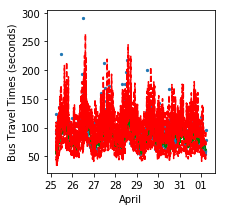

   LAG =  18
       Alpha =  3
7967/7967 [==============================] - 69s 9ms/sample - loss: 2501.0600
Model error (RMSE) =  33.65 seconds
Perecentage in 90% Prediction Interval (ICP) =  0.613


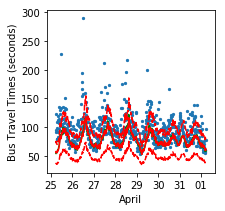

   LAG =  18
       Alpha =  4
7967/7967 [==============================] - 75s 9ms/sample - loss: 2649.8033
Model error (RMSE) =  35.59 seconds
Perecentage in 90% Prediction Interval (ICP) =  0.402


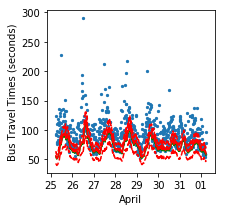

   LAG =  18
       Alpha =  5
7967/7967 [==============================] - 68s 9ms/sample - loss: 2033.4033
Model error (RMSE) =  30.56 seconds
Perecentage in 90% Prediction Interval (ICP) =  0.929


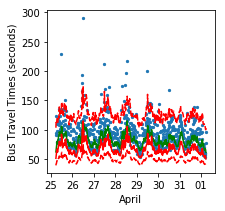

   LAG =  18
       Alpha =  6
7967/7967 [==============================] - 74s 9ms/sample - loss: 1891.9202
Model error (RMSE) =  32.96 seconds
Perecentage in 90% Prediction Interval (ICP) =  0.729


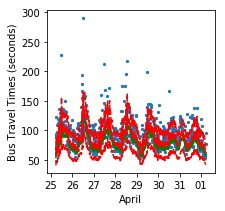

   LAG =  18
       Alpha =  7
7967/7967 [==============================] - 83s 10ms/sample - loss: 1942.8110
Model error (RMSE) =  29.15 seconds
    --- > BEST SO FAR!
Perecentage in 90% Prediction Interval (ICP) =  0.967


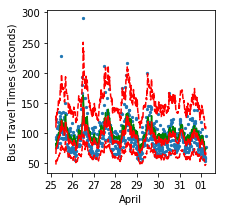

   LAG =  18
       Alpha =  8
7967/7967 [==============================] - 75s 9ms/sample - loss: 2215.1671
Model error (RMSE) =  31.45 seconds
Perecentage in 90% Prediction Interval (ICP) =  0.884


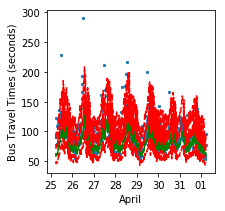

   LAG =  21
       Alpha =  2
7967/7967 [==============================] - 100s 13ms/sample - loss: 2573.2469
Model error (RMSE) =  34.79 seconds
Perecentage in 90% Prediction Interval (ICP) =  0.792


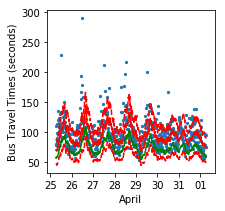

   LAG =  21
       Alpha =  3
7967/7967 [==============================] - 72s 9ms/sample - loss: 1911.7002
Model error (RMSE) =  30.65 seconds
Perecentage in 90% Prediction Interval (ICP) =  0.933


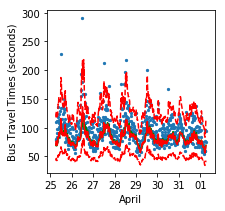

   LAG =  21
       Alpha =  4
7967/7967 [==============================] - 117s 15ms/sample - loss: 2478.8102
Model error (RMSE) =  29.77 seconds
Perecentage in 90% Prediction Interval (ICP) =  0.765


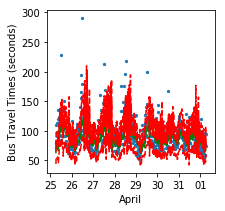

   LAG =  21
       Alpha =  5
7967/7967 [==============================] - 97s 12ms/sample - loss: 2033.5522
Model error (RMSE) =  31.18 seconds
Perecentage in 90% Prediction Interval (ICP) =  0.932


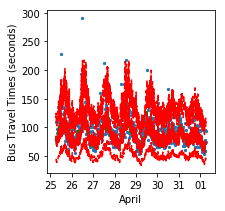

   LAG =  21
       Alpha =  6
7967/7967 [==============================] - 131s 16ms/sample - loss: 2561.9345
Model error (RMSE) =  29.80 seconds
Perecentage in 90% Prediction Interval (ICP) =  0.900


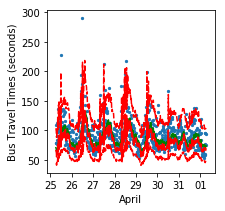

   LAG =  21
       Alpha =  7
7967/7967 [==============================] - 100s 13ms/sample - loss: 2007.8634
Model error (RMSE) =  29.90 seconds
Perecentage in 90% Prediction Interval (ICP) =  0.298


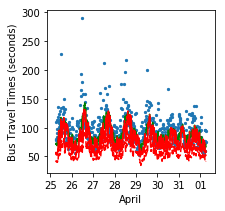

   LAG =  21
       Alpha =  8
7967/7967 [==============================] - 282s 35ms/sample - loss: 2355.0597
Model error (RMSE) =  30.83 seconds
Perecentage in 90% Prediction Interval (ICP) =  0.708


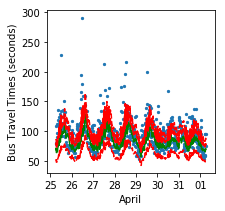

PARTITION  2
   LAG =  12
       Alpha =  2
7967/7967 [==============================] - 108s 14ms/sample - loss: 1766.1057
Model error (RMSE) =  34.14 seconds
Perecentage in 90% Prediction Interval (ICP) =  0.865


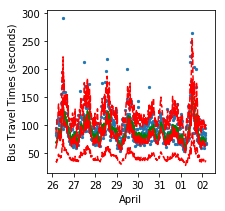

   LAG =  12
       Alpha =  3
7967/7967 [==============================] - 71s 9ms/sample - loss: 1631.0407
Model error (RMSE) =  35.66 seconds
Perecentage in 90% Prediction Interval (ICP) =  0.912


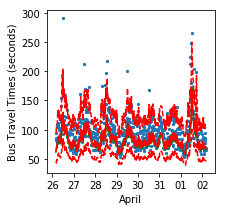

   LAG =  12
       Alpha =  4
7967/7967 [==============================] - 104s 13ms/sample - loss: 1937.8660
Model error (RMSE) =  36.07 seconds
Perecentage in 90% Prediction Interval (ICP) =  0.958


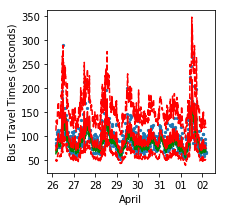

   LAG =  12
       Alpha =  5
7967/7967 [==============================] - 123s 15ms/sample - loss: 1709.5333
Model error (RMSE) =  34.33 seconds
Perecentage in 90% Prediction Interval (ICP) =  0.961


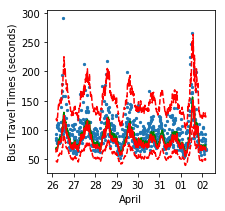

   LAG =  12
       Alpha =  6
7967/7967 [==============================] - 67s 8ms/sample - loss: 1796.4672
Model error (RMSE) =  34.57 seconds
Perecentage in 90% Prediction Interval (ICP) =  0.958


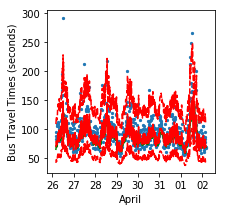

   LAG =  12
       Alpha =  7
7967/7967 [==============================] - 85s 11ms/sample - loss: 1671.8969
Model error (RMSE) =  35.52 seconds
Perecentage in 90% Prediction Interval (ICP) =  0.891


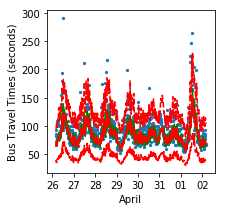

   LAG =  12
       Alpha =  8
7967/7967 [==============================] - 67s 8ms/sample - loss: 1736.3556
Model error (RMSE) =  36.31 seconds
Perecentage in 90% Prediction Interval (ICP) =  0.720


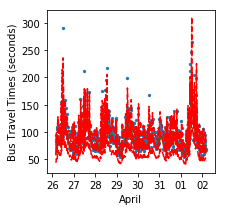

   LAG =  15
       Alpha =  2
7967/7967 [==============================] - 95s 12ms/sample - loss: 2451.7709
Model error (RMSE) =  34.41 seconds
Perecentage in 90% Prediction Interval (ICP) =  0.699


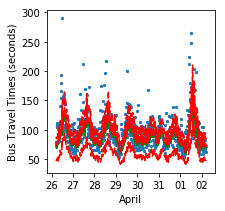

   LAG =  15
       Alpha =  3
7967/7967 [==============================] - 74s 9ms/sample - loss: 1986.0540
Model error (RMSE) =  33.22 seconds
Perecentage in 90% Prediction Interval (ICP) =  0.744


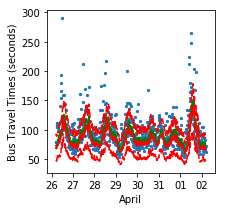

   LAG =  15
       Alpha =  4
7967/7967 [==============================] - 91s 11ms/sample - loss: 1855.8546
Model error (RMSE) =  34.81 seconds
Perecentage in 90% Prediction Interval (ICP) =  0.900


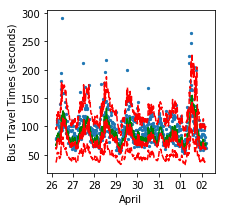

   LAG =  15
       Alpha =  5
7967/7967 [==============================] - 75s 9ms/sample - loss: 1748.5642
Model error (RMSE) =  34.75 seconds
Perecentage in 90% Prediction Interval (ICP) =  0.939


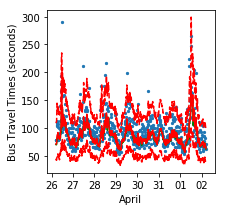

   LAG =  15
       Alpha =  6
7967/7967 [==============================] - 114s 14ms/sample - loss: 1729.7091
Model error (RMSE) =  36.55 seconds
Perecentage in 90% Prediction Interval (ICP) =  0.957


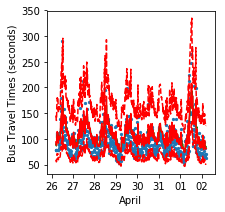

   LAG =  15
       Alpha =  7


KeyboardInterrupt: 

In [16]:
time_res_mins = 15
preds = 1
alphas = np.arange(2, 9)
num_lags = 4
rmse  = np.zeros((num_partitions, num_lags, len(alphas)))
icp  = np.zeros((num_partitions, num_lags, len(alphas)))
time_res_mins = 15
preds = 1

for partition in range(num_partitions):
    rmse_best = 1000000
    print("PARTITION ", partition + 1)
    for lag_ind in range(num_lags):
        lag = 12 + 3*lag_ind
        train_ind = np.arange(partition, period_train_days + partition)
        test_ind = np.arange(period_train_days + partition, period_train_days + partition + period_test_days)
        
        X, y, times = load.timeseries(data, lag, preds, time_res_mins)
        X_train, y_train, X_test, y_test, times_train, times_test = load.split_time2(X, y, times, train_ind, test_ind)
        
        for a in range(len(alphas)):
            print("   LAG = ", lag)
            print("       Alpha = ", alphas[a])
            ## Reformat y to have (J+1) columns
            quantiles = np.array([0.05, 0.50, 0.95])
            y_traink = y_train
            for k in range(len(quantiles)):
                y_traink = np.concatenate((y_traink, y_train), axis=1)
                
            num_nodes = int(X_train.shape[0] / (alphas[a]*(X_train.shape[1]+ y_train.shape[1])))
            mod = models.build_model(num_nodes, 
                                     input_dim = X_train.shape[1], 
                                     output_dim = 1 + len(quantiles), 
                                     loss = lambda y, f: models.multi_tilted_loss(quantiles, y, f))
            
            mod.fit(X_train, y_traink)
            y_pred = mod.predict(X_test)[:,:,0] ## Ask Filipe why we take just one column out of the four
            y_pred_mean = y_pred[:,0]
            y_pred_lwr  = y_pred[:,1]
            y_pred_med  = y_pred[:,2]
            y_pred_upr  = y_pred[:,3]
            
            rmse[partition, lag_ind, a] = np.sqrt(np.mean((y_pred_mean - y_test[:,:,0])**2))
                
            icp[partition, lag_ind, a] = np.sum(np.logical_and( (y_test[:,0,0] > y_pred_lwr),(y_test[:,0,0] < y_pred_upr) )) / y_test.shape[0]
            print("Model error (RMSE) = ", "%.2f" % rmse[partition, lag_ind, a], "seconds")
            if(rmse[partition, lag_ind, a] < rmse_best):
                print("    --- > BEST SO FAR ON THIS PARTITION!")
                rmse_best = rmse[partition, lag_ind, a]
            print("Perecentage in 90% Prediction Interval (ICP) = ", "%.3f" % icp[partition, lag_ind, a])
            
            fig, ax = plt.subplots(figsize = (8,3))
            plt.ylabel("Bus Travel Times (seconds)")
            plt.xlabel("April")
            plt.plot(times_test, y_pred_mean, c = 'g')

            ax.xaxis.set_major_formatter(DateFormatter("%d"))
            plt.plot(times_test, y_pred_lwr, c = 'r', linestyle = "--")
            plt.plot(times_test, y_pred_upr, c = 'r', linestyle = "--")
            plt.plot(times_test, y_pred_med, c = 'r')
            plt.scatter(times_test, y_test, s = 5)
            plt.show()
            
            

In [15]:
(np.logical_and( (y_test[:,0,0] > y_pred_lwr),(y_test[:,0,0] < y_pred_upr) )).shape

(672,)

In [14]:
(y_test[:,0,0] > y_pred_lwr).shape

(672,)

In [85]:
np.min(rmse)

26.14479364692732

In [62]:
np.mean(err[:,:,4])

94.16073689758969

In [51]:
2 + 7*2

16

In [64]:
alphas

array([2, 3, 4, 5, 6, 7, 8])